In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
dataset = pd.read_excel('Data_Cortex_Nuclear.xls').drop('MouseID', axis=1).drop('Behavior', axis=1).drop('Treatment', axis=1).drop('Genotype', axis=1).drop('CaNA_N', axis=1)

In [3]:
dataset.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,c-CS-m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,c-CS-m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,c-CS-m


DYRK1A_N       3
ITSN1_N        3
BDNF_N         3
NR1_N          3
NR2A_N         3
            ... 
SYP_N          0
H3AcK18_N    180
EGR1_N       210
H3MeK4_N     270
class          0
Length: 77, dtype: int64

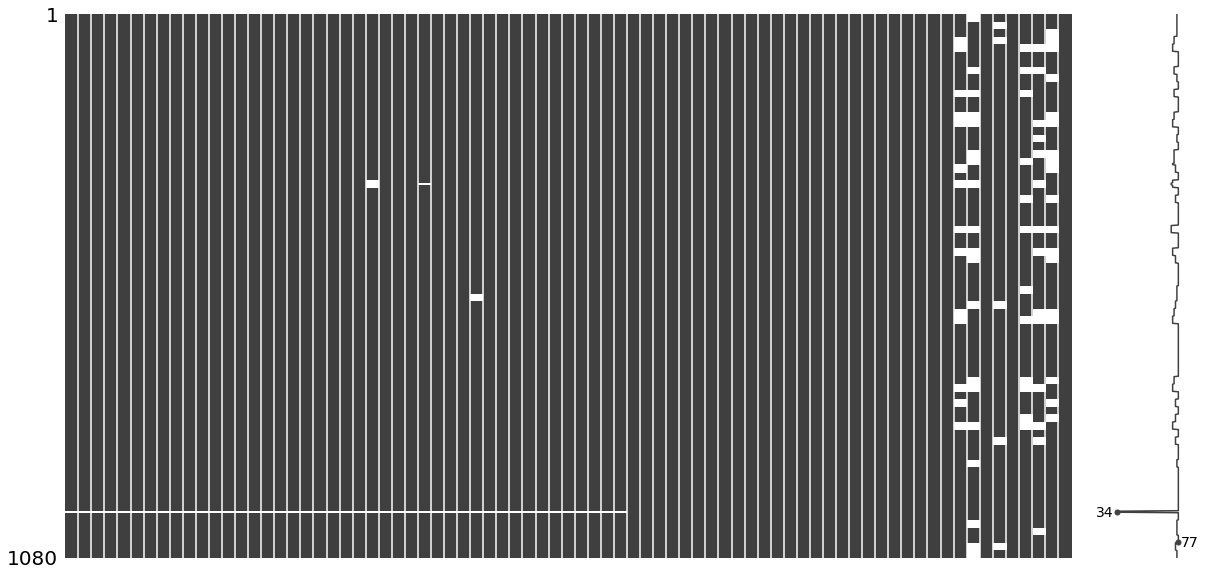

In [4]:
missingno.matrix(dataset, figsize=(20, 10))
dataset.isna().sum()

In [5]:
#replace NaN values with feature's mean
for column in list(dataset.columns)[:-1]:
    dataset[column] = dataset[column].fillna(dataset[column].mean())

DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
SYP_N        0
H3AcK18_N    0
EGR1_N       0
H3MeK4_N     0
class        0
Length: 77, dtype: int64

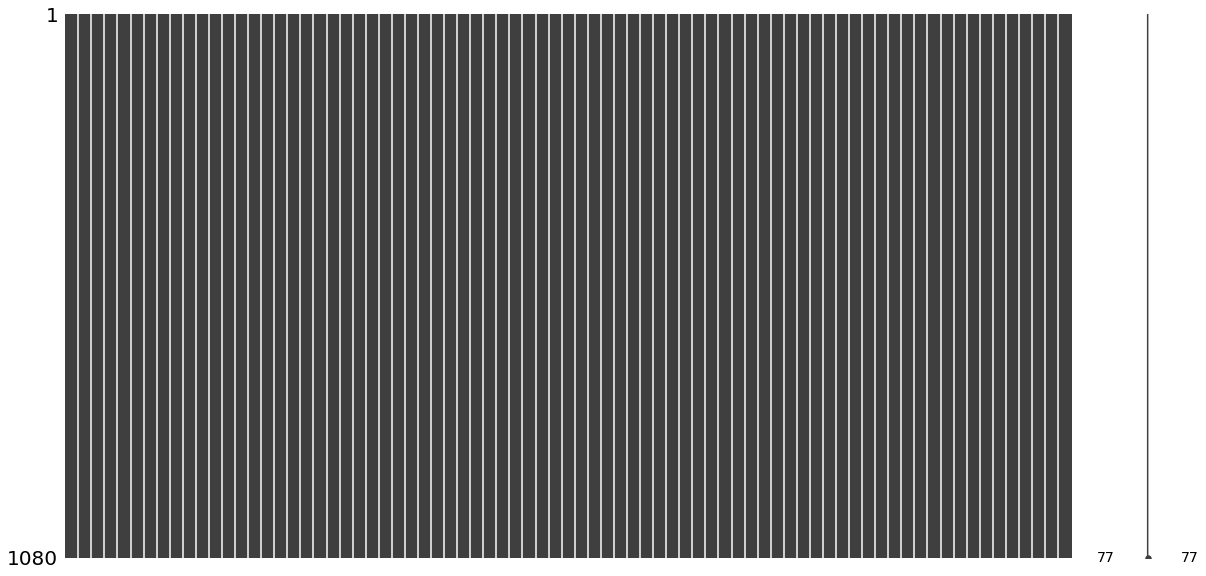

In [6]:
missingno.matrix(dataset, figsize=(20, 10))
dataset.isna().sum()

In [8]:
dataset.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,...,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.848767,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440
std,0.249015,0.251290,0.049314,0.346810,0.931802,0.041577,0.027004,1.293368,0.032542,0.466254,...,0.094311,0.028989,0.026461,0.023519,0.014276,0.023018,0.066432,0.054222,0.036261,0.048069
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.577397,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787
25%,0.288163,0.473669,0.287650,2.059152,3.160287,0.205821,0.164619,2.479861,0.190828,1.206389,...,0.793739,0.206395,0.141045,0.119986,0.110839,0.114373,0.398082,0.133969,0.159168,0.174271
50%,0.366540,0.566365,0.316703,2.297269,3.763306,0.231246,0.182270,3.329624,0.210681,1.356368,...,0.849858,0.224000,0.157914,0.134762,0.121626,0.128466,0.448459,0.169609,0.183135,0.205440
75%,0.487574,0.697500,0.348039,2.528035,4.425107,0.257225,0.197226,4.480652,0.234558,1.560931,...,0.916173,0.241655,0.167584,0.139331,0.131955,0.142427,0.490773,0.187174,0.196133,0.219242
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,1.204598,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903


In [10]:
columns = list(set(dataset['class']))
for i, column in enumerate(columns):
    dataset.loc[dataset['class'] == column, 'class'] = i
dataset
# dataset.loc[dataset['class']]

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.134762,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.134762,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.134762,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.134762,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.134762,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.275547,0.190483,0.134762,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,7
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.283207,0.190463,0.134762,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,7
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.290843,0.216682,0.134762,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,7
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.306701,0.222263,0.134762,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,7


In [ ]:
# from sklearn.manifold import TSNE
# tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(dataset)

In [ ]:
# from bioinfokit.visuz import cluster
# cluster.tsneplot(score=tsne_em)

In [ ]:
# color_class = dataset['class'].to_numpy()
# cluster.tsneplot(score=tsne_em, colorlist=color_class, legendpos='upper right', legendanchor=(1.15, 1) )

In [14]:
pca = PCA(n_components = 2)

pca_dataset = dataset.copy()
pca_transform = pca.fit_transform(pca_dataset)

dataset_pca = pd.DataFrame(data = pca_transform, columns = ['pca1', 'pca2'])

# dataset_pca = pd.concat([tmpDf, dataset[['class']]], axis=1)
dataset_pca.head()

,pca1,pca2
0,3.915933,1.445466
1,3.864428,1.025992
2,3.857199,0.997158
3,3.763303,0.109967
4,3.721829,-0.131662


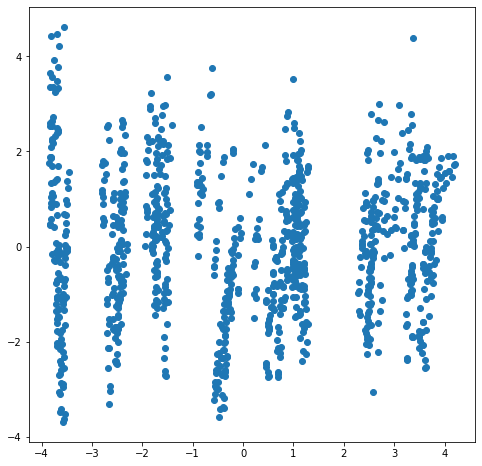

In [15]:
plt.figure(figsize=(8, 8))
plt.scatter(dataset_pca.pca1, dataset_pca.pca2)

In [16]:
sil = list()
wcv = {}
kmax = 10

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(dataset_pca)
    wcv[k] = kmeans.inertia_ #use for WSS (elbow method)
    labels = kmeans.labels_
    sil.append(silhouette_score(dataset_pca, labels, metric = 'euclidean')) #use for silhouette method

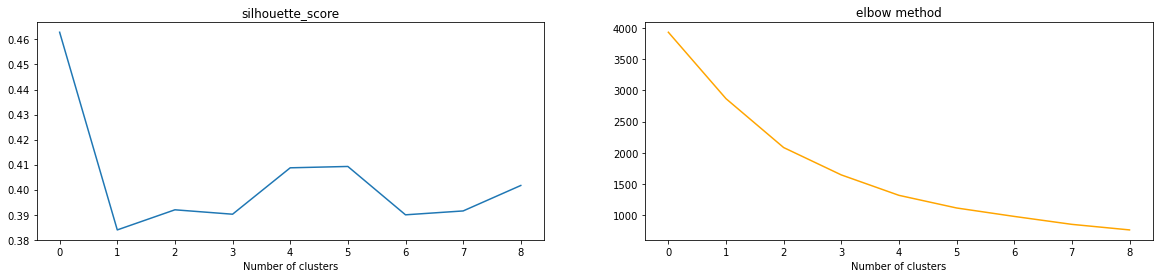

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))

ax1.set_title("silhouette_score")
ax2.set_title("elbow method")

ax1.set_xlabel("Number of clusters")
ax2.set_xlabel("Number of clusters")

ax1.plot(sil)
ax2.plot(list(wcv.values()), color='orange')

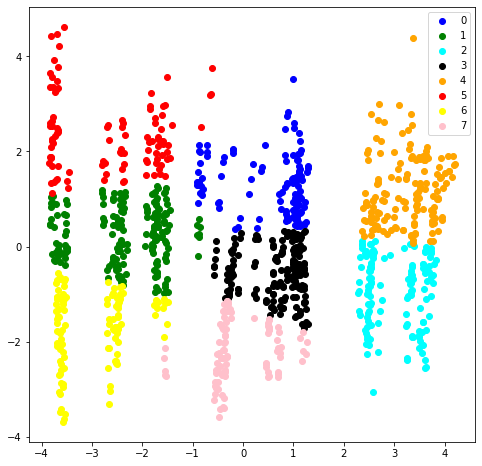

In [18]:
no_clusters = 8
kmeans = KMeans(n_clusters = no_clusters)
kmeans.fit(dataset_pca)

pred = kmeans.predict(dataset_pca)
frame = dataset_pca.copy()
# frame = pd.DataFrame(dataset_pca)
frame['cluster'] = pred
frame.columns = ['pca1', 'pca2', 'cluster']

plt.figure(figsize=(8, 8))
#plotting results
color=['blue','green','cyan', 'black', 'orange', 'red', 'yellow', 'pink']
for k in range(0, no_clusters):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["pca1"],data["pca2"],c=color[k], label=k)
plt.legend()
plt.show()

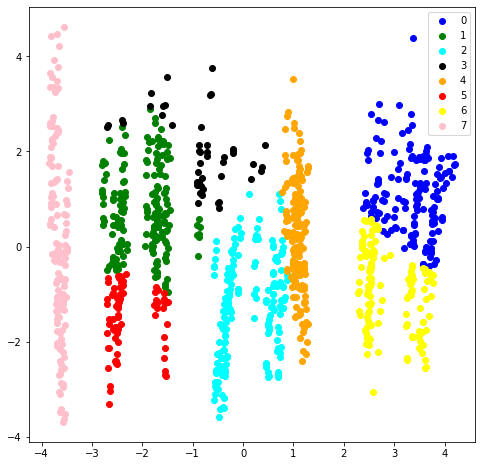

In [19]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=no_clusters)
gmm.fit(dataset_pca)
labels = gmm.predict(dataset_pca)
frame1 = pd.DataFrame(dataset_pca)
frame1['cluster'] = labels
frame1.columns = ['pca1', 'pca2', 'cluster']

plt.figure(figsize=(8, 8))

color=['blue','green','cyan', 'black', 'orange', 'red', 'yellow', 'pink']
for k in range(0, no_clusters):
    data = frame1[frame1["cluster"]==k]
    plt.scatter(data["pca1"],data["pca2"],c=color[k], label=k)
plt.legend()
plt.show()